### 다중 클래스 분류용 선형 모델

In [49]:
from scipy import sparse
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib 
import scipy as sp
import matplotlib.pyplot as plt
import IPython
import sklearn
import mglearn
from sklearn.model_selection import train_test_split

In [50]:
#X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

In [53]:
# (로지스틱 회귀만 제외하고) 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원함
#로지스틱 회귀는 softmax 함수를 사용한 다중 클래스 분류 알고리즘을 지원함
#즉, multiclass 다중 클래스를 지원 X 
#이중 분류 알고리즘을 다중 으로 분류하는 건 one vs -rest 방법임.

#일대 다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킴
#결국, 클래스의 수만큼 이진 분류 모델이 만들어짐.

#클래스 별 이진 분류기를 만들면, 각 클래스가 계수 벡터(w) 와 절편(b)를 하나씩 갖게 됨.
#분류 신뢰도를 나타내는 다음 공식의 결과값이 가장 높은 클래스가 해당 데이터 크래스 레이블로 할당됨
#w[0] * x[0] + w[1] * x[1] ... w[p] * x[p]+ b

#다중은 이중과 수학적인 면은 다름. 그러나, 여기서도 클래스마다 하나의 계수 벡터와 절편을 만들며 예측방법도 비슷함

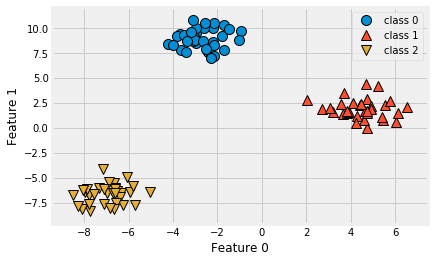

In [63]:
#세개의 클래스를 가진 간단한 데이터세세 일대 다 방식 적용
#이 데이터는 2차원이며 각 클래스의 데이터는 정규분포(가우시안 분포)를 따른다.

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #2차원 배열에서 1열(w) first vector, 그리고 그 당므은 second vector
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["class 0","class 1", "class 2"])

In [66]:
#LinearSVC 분류기
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기 : ", linear_svm.coef_.shape) 
#coef_배열의 크기는 (3,2) => 세개의 클래스에 각각 대응하는 계수 백터를 담고 있다.
#열은 각 특성에 따른 계수 값(이 데이터셋에서는 두 개)를 가지고 있음.
print("계수 배열의 크기 : ", linear_svm.intercept_.shape)
#intercept_는 각 클래스의 절편을 담은 1차원 벡터임.

# 기울기: line_fitter.coef_
# 절편: line_fitter.intercept_

계수 배열의 크기 :  (3, 2)
계수 배열의 크기 :  (3,)


In [67]:
linear_svm

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

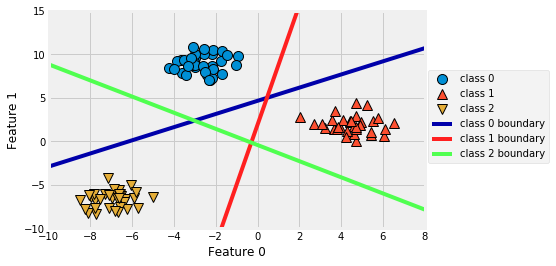

In [74]:
#세개의 이진 분류기가 만드는 경계를 시각화하자.

mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,  mglearn.cm3.colors) :
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 
            'class 2 boundary'], loc=(1.01, 0.3))

In [75]:
# 훈련 데이터의 클래스 0에 속한 모든 포인트는 클래스 0을 구분하는 직선 위에, 즉 이진분류기가 만든 클래스 0 지역에 존재
# 그런데, 클래스 0에 속한 포인트는 클래스 2를 구분하는 직선 위, 즉 크래스 2의 이진 분류기에 의해 나머지로 분류
#또한, 클래스 0에 속한 포인트는 클래스 1을 구분하는 직선 왼쪽, 즉 클래스 1의 이진 분류기에 의해서도 나머지로 분류 됨

#그러므로, 이 영역의 어떤 포인트든 최종 분류기는 클래스 0으로 분류할 것임.
#(클래스 0 분류 신뢰도 공식의 결과는 0보다 크고 다른 두 클래스의 경우는 0보다 작을 것임.)

#하지만, 중앙의 삼각형 영역은 어떨까? 세 분류기가 모두 나머지로 분류함.
#이곳의 데이터 포인트는 어떤 클래스로 분류 될까? 정답은 분류 공식의 결과가 가장 높은 클래스 임.
#즉, 가장 가까운 '직선의 클래스' 가 될 것이다.

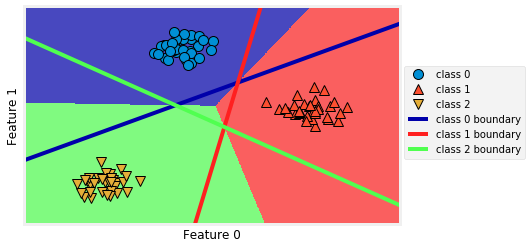

In [77]:
#2차원 평면의 모든 포인트에 대한 예측 결과를 보여주는 것

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors) :
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c =color)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 
            'class 2 boundary'], loc=(1.01, 0.3))

In [78]:
#세 개의 일대다 분류기가 만든 다중 클래스 결정 경계

In [79]:
#장단점과 매개 변수

# 선형모델의 주요 매개변수는 회귀 모델에서의 Alpha 였고, 
# LinearSVC와 LogisticsRegression 에서는 C임. alpha 값이 클 수록, C 값이 작을수록 모델이 단순해짐

#특히, 회귀모델에서 이 매개변수를 조정하는 일이 매우 중요함. 
#C와 alpha는 로그스케일로 최적치를 정함. -> 보통 10배씩 변경함 ->자릿수가 바뀌게 (0.01), 1, 10 
#그리고, l1 규제를 사용할지 l2 규제를 사용할지를 정해야 함.

#L1 : 중요 특성이 많지 않다고 생각할 경우
#L2 : 기본적인 규제

#L1 : 모델의 해석이 중요한 요소일때도 사용하는 경우 -> 몇가지 특성만 사용하기 때문에
#모델에서 중요 특성이 무엇이고, 그 효과가 어느정도 일때 설명하기 쉬움

In [80]:
#선형모델은 학습속도가 빠르고, 예측도 빠르다. 큰 데이터셋과 희소에도 잘 작동
#빠르게 처리 -> LogisticRegression과 Ridge에 solver=  'sag' 옵션을 줌. SAG -> 확률적 평균 경사 하강법
#대안 : SGDClassfier, SGDRegressor -> 확률적 경사 하강법

In [81]:
#선형 모델의 장점 : 회귀와 분류에서 본 공식(for x in range len(n ): W * x ) 을 사용해 예측이 어떻게 되는지 설명가능
#하지만, 계수의 값들이 왜 그런지 명확하지 않을때가 종종 있음.
#특히, 데이터세싀 득성들이 서로 깊게 연관되어 있는 경우 -> 계수 분석이 어려움

#선형모델은 샘플에 비해 '특성' 이 만흘때 잘 작동함, 큰 데이터셋에도 용이.
#저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋음.

In [84]:
#커널 서포트 벡터머신에서 선형 모델이 실패 예제

#모델 객체 생성과 학습을 한번에 실행
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)

In [86]:
#사이킷런의 fit 메서드는 self를 반환함 -> fit 메서드 반환값 (self) 은 학습된 모델로, logreg에 저장됨
#이처럼, 메서드 호출을 잇는것 ( init 과 fit) 을 메서드 연결이라고 함.
#싸이킷런에서는 fit과 predict를 한 줄에 쓰는 메서드 연결이 자주 발생

#self는 호출된 메서드를 정의한 객체 자신
#__init__ 메서드는 객체가 생성될때 자동으로 호출되는 특수한 메서드(생성자)

In [87]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [89]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [92]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test) #비추천 -> 학습된 LR 모델은 변수에 할당되지도 않음.

In [93]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])